## MLP3

#### Load data and training-test split

In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# read data from CSV file to dataframe
df = pd.read_csv(r"./input/kc_sales_cleaned.csv")

# make sure you understand the type of the object
print(type(df))

# check the top five and the botoom five data tuples
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0         3       1.00   
1           1  6414100192  20141209T000000  538000.0         3       2.25   
2           2  5631500400  20150225T000000  180000.0         2       1.00   
3           3  2487200875  20141209T000000  604000.0         4       3.00   
4           4  1954400510  20150218T000000  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  yr_built  yr_renovated  \
0         1180      5650     1.0           0  ...      1955             0   
1         2570      7242     2.0           0  ...      1951          1991   
2          770     10000     1.0           0  ...      1933             0   
3         1960      5000     1.0           0  ...      1965             0   
4         1680      8080     1.0           0  ...      1987             0   

   zipcode      lat     long  sqft_l

#### Model 1: Decision trees

In [3]:
# Split the data to training and testing
from sklearn.model_selection import train_test_split

# We use bedrooms, bathrooms, sqft_living, sqft_lot, and 'most_recent' attributes
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
y = df['price_range']

# split the data 80% for training, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

In [6]:
target_names = ['Under', 'Over']

In [5]:
# Entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold # import k-fold validation

# decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)

# k-fold cross validation (k=10)
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds
precision_sum = recall_sum = accuracy_sum = 0

# DataFrame for storing validation metrics
metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

# each fold
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    precision_sum += result_metrics_dict["macro avg"]["precision"]
    recall_sum += result_metrics_dict["macro avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]
    
    # Store metrics data for later analysis
    metrics_list = []
    metrics_list.append(result_metrics_dict["macro avg"]["precision"])
    metrics_list.append(result_metrics_dict["macro avg"]["recall"])
    metrics_list.append(result_metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

print("Average precision (ENTROPY):", precision_sum/kf.get_n_splits(X))
print("Average recall (ENTROPY):", recall_sum/kf.get_n_splits(X))
print("Average accuracy (ENTROPY):", accuracy_sum/kf.get_n_splits(X))

os.makedirs('./MLP3_data', exist_ok=True)  
metrics_df.to_csv('./MLP3_data/entropy_metrics.csv')


              precision    recall  f1-score   support

       Under       0.81      0.82      0.81      1337
        Over       0.70      0.69      0.69       825

    accuracy                           0.77      2162
   macro avg       0.75      0.75      0.75      2162
weighted avg       0.77      0.77      0.77      2162

              precision    recall  f1-score   support

       Under       0.82      0.84      0.83      1368
        Over       0.71      0.69      0.70       794

    accuracy                           0.78      2162
   macro avg       0.77      0.76      0.77      2162
weighted avg       0.78      0.78      0.78      2162

              precision    recall  f1-score   support

       Under       0.79      0.83      0.81      1370
        Over       0.68      0.62      0.65       792

    accuracy                           0.75      2162
   macro avg       0.73      0.73      0.73      2162
weighted avg       0.75      0.75      0.75      2162

              preci

In [6]:
# Gini

# Construct a decision tree using gini index
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=42)

# 10-fold CV
kf = KFold(n_splits=10, random_state=None, shuffle=True) 
precision_sum = recall_sum = accuracy_sum = 0

# DataFrame for storing validation metrics
metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # read to file
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    precision_sum += result_metrics_dict["macro avg"]["precision"]
    recall_sum += result_metrics_dict["macro avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]
    
    metrics_list = []
    metrics_list.append(result_metrics_dict["macro avg"]["precision"])
    metrics_list.append(result_metrics_dict["macro avg"]["recall"])
    metrics_list.append(result_metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

print("Average precision (GINI):", precision_sum/kf.get_n_splits(X))
print("Average recall (GINI):", recall_sum/kf.get_n_splits(X))
print("Average accuracy (GINI):", accuracy_sum/kf.get_n_splits(X))

os.makedirs('./MLP3_data', exist_ok=True)  
metrics_df.to_csv('./MLP3_data/gini_metrics.csv')


              precision    recall  f1-score   support

       Under       0.82      0.82      0.82      1364
        Over       0.70      0.69      0.69       798

    accuracy                           0.77      2162
   macro avg       0.76      0.75      0.76      2162
weighted avg       0.77      0.77      0.77      2162

              precision    recall  f1-score   support

       Under       0.79      0.85      0.82      1371
        Over       0.70      0.61      0.65       791

    accuracy                           0.76      2162
   macro avg       0.75      0.73      0.74      2162
weighted avg       0.76      0.76      0.76      2162

              precision    recall  f1-score   support

       Under       0.79      0.85      0.82      1354
        Over       0.71      0.62      0.66       808

    accuracy                           0.76      2162
   macro avg       0.75      0.73      0.74      2162
weighted avg       0.76      0.76      0.76      2162

              preci

In [7]:
#Change max depth and observe results 

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
y = df['price_range']

# split the data 80% for training, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

gini_metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])
entropy_metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for i in [3,4,5]:
    tree_clf_gini = DecisionTreeClassifier(max_depth= i, criterion="gini", random_state=42)
    tree_clf_entropy = DecisionTreeClassifier(max_depth = i, criterion="entropy", random_state=42)
    
    tree_clf_gini.fit(X_train, y_train)
    tree_clf_entropy.fit(X_train, y_train)
    
    y_pred_gini = tree_clf_gini.predict(X_test)
    
    y_pred_entropy = tree_clf_entropy.predict(X_test)    
    
    print("Performance information for gini classifier on max depth = ", i, ":")
    print()
    
    print(classification_report(y_test, y_pred_gini, target_names=target_names))
    
    result_metrics_dict_gini = classification_report(y_test, y_pred_gini, target_names=target_names, output_dict=True)
    print("Precision (GINI):", result_metrics_dict_gini["macro avg"]["precision"])
    print("Recall (GINI):", result_metrics_dict_gini["macro avg"]["recall"])
    print("Accuracy (GINI):", result_metrics_dict_gini["accuracy"])
    print()
    
    print("Performance information for entropy classifier on max depth = ", i, ":")
    print()
    
    print(classification_report(y_test, y_pred_entropy, target_names=target_names))
    
    result_metrics_dict_entropy = classification_report(y_test, y_pred_entropy, target_names=target_names, output_dict=True)
    print("Precision (ENTROPY):", result_metrics_dict_entropy["macro avg"]["precision"])
    print("Recall (ENTROPY):", result_metrics_dict_entropy["macro avg"]["recall"])
    print("Accuracy (ENTROPY):", result_metrics_dict_entropy["accuracy"])
    print()
    
    gini_metrics_list = []
    gini_metrics_list.append(result_metrics_dict_gini["macro avg"]["precision"])
    gini_metrics_list.append(result_metrics_dict_gini["macro avg"]["recall"])
    gini_metrics_list.append(result_metrics_dict_gini["accuracy"])
    
    gini_metrics_series = pd.Series(gini_metrics_list, index=gini_metrics_df.columns)
    gini_metrics_series.name = i
    gini_metrics_df = gini_metrics_df.append(gini_metrics_series)
    
    entropy_metrics_list = []
    entropy_metrics_list.append(result_metrics_dict_entropy["macro avg"]["precision"])
    entropy_metrics_list.append(result_metrics_dict_entropy["macro avg"]["recall"])
    entropy_metrics_list.append(result_metrics_dict_entropy["accuracy"])
    
    entropy_metrics_series = pd.Series(entropy_metrics_list, index=entropy_metrics_df.columns)
    entropy_metrics_series.name = i
    entropy_metrics_df = entropy_metrics_df.append(entropy_metrics_series)
      
gini_metrics_df.to_csv('./MLP3_data/gini_depth_metrics.csv')
entropy_metrics_df.to_csv('./MLP3_data/entropy_depth_metrics.csv')

Performance information for gini classifier on max depth =  3 :

              precision    recall  f1-score   support

       Under       0.83      0.84      0.83      2726
        Over       0.72      0.70      0.71      1597

    accuracy                           0.79      4323
   macro avg       0.77      0.77      0.77      4323
weighted avg       0.79      0.79      0.79      4323

Precision (GINI): 0.7715737156931738
Recall (GINI): 0.7694788145968849
Accuracy (GINI): 0.7869535045107564

Performance information for entropy classifier on max depth =  3 :

              precision    recall  f1-score   support

       Under       0.84      0.81      0.83      2726
        Over       0.69      0.74      0.72      1597

    accuracy                           0.78      4323
   macro avg       0.77      0.78      0.77      4323
weighted avg       0.79      0.78      0.79      4323

Precision (ENTROPY): 0.7688380414160795
Recall (ENTROPY): 0.7757599653789593
Accuracy (ENTROPY): 0.784408

In [8]:
# change k value and observe results

for k in [3,5,7,10]:
    
    kf = KFold(n_splits=k, shuffle=True)
    precision_sum_gini = recall_sum_gini = accuracy_sum_gini = 0
    precision_sum_entropy = recall_sum_entropy = accuracy_sum_entropy = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        tree_clf_gini = DecisionTreeClassifier(max_depth= i, criterion="gini", random_state=42)
        tree_clf_entropy = DecisionTreeClassifier(max_depth = i, criterion="entropy", random_state=42)
    
        tree_clf_gini.fit(X_train, y_train)
        tree_clf_entropy.fit(X_train, y_train)
    
        y_pred_gini = tree_clf_gini.predict(X_test)
        y_pred_entropy = tree_clf_entropy.predict(X_test)  
        
    
        result_metrics_dict_gini = classification_report(y_test, y_pred_gini, target_names=target_names, output_dict=True)
        result_metrics_dict_entropy = classification_report(y_test, y_pred_entropy, target_names=target_names, output_dict=True)
    
        precision_sum_gini += result_metrics_dict_gini["macro avg"]["precision"]
        recall_sum_gini += result_metrics_dict_gini["macro avg"]["recall"]
        accuracy_sum_gini += result_metrics_dict_gini["accuracy"]
        
        precision_sum_entropy += result_metrics_dict_entropy["macro avg"]["precision"]
        recall_sum_entropy += result_metrics_dict_entropy["macro avg"]["recall"]
        accuracy_sum_entropy += result_metrics_dict_entropy["accuracy"]
        
    print("Results for K = ", k, "\n")
    
    print("Average precision (GINI):", precision_sum_gini/kf.get_n_splits(X))
    print("Average recall (GINI):", recall_sum_gini/kf.get_n_splits(X))
    print("Average accuracy (GINI):", accuracy_sum_gini/kf.get_n_splits(X), "\n")
    
    print("Average precision (ENTROPY):", precision_sum_entropy/kf.get_n_splits(X))
    print("Average recall (ENTROPY):", recall_sum_entropy/kf.get_n_splits(X))
    print("Average accuracy (ENTROPY):", accuracy_sum_entropy/kf.get_n_splits(X), "\n")
    

Results for K =  3 

Average precision (GINI): 0.7778643726545081
Average recall (GINI): 0.7591647168172875
Average accuracy (GINI): 0.789108243383434 

Average precision (ENTROPY): 0.7797965676533513
Average recall (ENTROPY): 0.7549891414953288
Average accuracy (ENTROPY): 0.7884143836095889 

Results for K =  5 

Average precision (GINI): 0.7784578512569724
Average recall (GINI): 0.7617115677026007
Average accuracy (GINI): 0.7905887848676563 

Average precision (ENTROPY): 0.7775178803230853
Average recall (ENTROPY): 0.7554042584266829
Average accuracy (ENTROPY): 0.7878586851235222 

Results for K =  7 

Average precision (GINI): 0.7782504800583844
Average recall (GINI): 0.7556461808671922
Average accuracy (GINI): 0.7885078857950427 

Average precision (ENTROPY): 0.7779967938596112
Average recall (ENTROPY): 0.7590108125531908
Average accuracy (ENTROPY): 0.7888783117138153 

Results for K =  10 

Average precision (GINI): 0.7769933116733166
Average recall (GINI): 0.7542627026146336
Aver

The performance of the gini and entropy classifiers was actually fairly similar on the same testing set, and the best performing depth appeared to be max depth = 5. Changing the value of K didn't change the results significantly.

In [9]:
# Plot important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.73


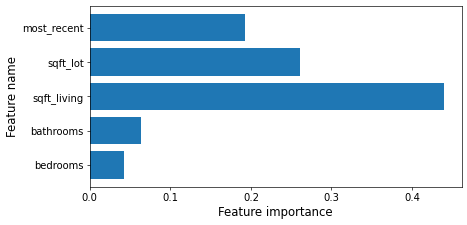

Feature importances: [0. 0. 1. 0. 0.]


In [10]:
# Find the important features of the entropy DT model
clf1 = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf1.score(X_test, y_test)))


plt.figure(figsize=(8,4), dpi=60)

# call the function above
plot_feature_importances(clf1, X.columns.values.tolist())
plt.show()

print('Feature importances: {}'.format(tree_clf.feature_importances_))

We will consider entropy Decision Tree with max depth = 5 and K = 10.

#### Decision Tree with max depth = 5 and K = 10

In [11]:
# Entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold # import k-fold validation

# decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# k-fold cross validation (k=10)
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds
precision_sum = recall_sum = accuracy_sum = 0

# DataFrame for storing validation metrics
metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

# each fold
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    precision_sum += result_metrics_dict["macro avg"]["precision"]
    recall_sum += result_metrics_dict["macro avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]
    
    # Store metrics data for later analysis
    metrics_list = []
    metrics_list.append(result_metrics_dict["macro avg"]["precision"])
    metrics_list.append(result_metrics_dict["macro avg"]["recall"])
    metrics_list.append(result_metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

print("Average precision (ENTROPY):", precision_sum/kf.get_n_splits(X))
print("Average recall (ENTROPY):", recall_sum/kf.get_n_splits(X))
print("Average accuracy (ENTROPY):", accuracy_sum/kf.get_n_splits(X))

#os.makedirs('./MLP3_data', exist_ok=True)  
metrics_df.to_csv('./MLP3_data/best_tree_metrics.csv')

              precision    recall  f1-score   support

       Under       0.84      0.88      0.86      1368
        Over       0.78      0.70      0.74       794

    accuracy                           0.82      2162
   macro avg       0.81      0.79      0.80      2162
weighted avg       0.81      0.82      0.81      2162

              precision    recall  f1-score   support

       Under       0.79      0.90      0.84      1378
        Over       0.76      0.58      0.65       784

    accuracy                           0.78      2162
   macro avg       0.77      0.74      0.75      2162
weighted avg       0.78      0.78      0.77      2162

              precision    recall  f1-score   support

       Under       0.80      0.84      0.82      1339
        Over       0.72      0.65      0.68       823

    accuracy                           0.77      2162
   macro avg       0.76      0.75      0.75      2162
weighted avg       0.77      0.77      0.77      2162

              preci

#### Model 2: kNN classifier

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [4]:
# We use bedrooms, bathrooms, sqft_living, sqft_lot, and 'most_recent' attributes
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
y = df['price_range']

# split the data 80% for training, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

In [10]:
# DONT USE THIS ONE
# find the best k value 
from sklearn.neighbors import KNeighborsClassifier
k_value = [1, 5, 15, 20, 25, 30]

metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}")
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    # Print classification report
    target_names = ['Under', 'Over']
   
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    print(result_metrics)
    
    #metrics_list = []
    #metrics_list.append(result_metrics["macro avg"]["precision"])
    #metrics_list.append(result_metrics["macro avg"]["recall"])
    #metrics_list.append(result_metrics["accuracy"])
    
    #metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    #metrics_series.name = k
    #metrics_df = metrics_df.append(metrics_series, ignore_index=True)

#metrics_df.to_csv('./MLP3_data/knn_metrics.csv')

k=1
[[2179  547]
 [ 634  963]]
              precision    recall  f1-score   support

       Under       0.77      0.80      0.79      2726
        Over       0.64      0.60      0.62      1597

    accuracy                           0.73      4323
   macro avg       0.71      0.70      0.70      4323
weighted avg       0.72      0.73      0.73      4323

k=5
[[2355  371]
 [ 617  980]]
              precision    recall  f1-score   support

       Under       0.79      0.86      0.83      2726
        Over       0.73      0.61      0.66      1597

    accuracy                           0.77      4323
   macro avg       0.76      0.74      0.75      4323
weighted avg       0.77      0.77      0.77      4323

k=15
[[2364  362]
 [ 615  982]]
              precision    recall  f1-score   support

       Under       0.79      0.87      0.83      2726
        Over       0.73      0.61      0.67      1597

    accuracy                           0.77      4323
   macro avg       0.76      0.74 

In [8]:
#Change K value and observe results 

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
y = df['price_range']

# split the data 80% for training, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

k_values = [1, 3, 5, 10, 15, 20, 25, 30]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    #train_score.append(knn.score(X_train, y_train))
    #test_score.append(knn.score(X_test, y_test)) 
    
    print("Performance information for KNN classifier on K = ", k, ":")
    print()
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    #print(confusion_mat)
    
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    results = classification_report(y_test, y_pred, target_names=target_names)
    #print(results)
    
    metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)
    
    print("Precision:", metrics_dict["macro avg"]["precision"])
    print("Recall:", metrics_dict["macro avg"]["recall"])
    print("Accuracy:", metrics_dict["accuracy"])
    print()
    
    metrics_list = []
    metrics_list.append(metrics_dict["macro avg"]["precision"])
    metrics_list.append(metrics_dict["macro avg"]["recall"])
    metrics_list.append(metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_series.name = k
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

metrics_df.to_csv('./MLP3_data/knn_metrics.csv') 


Performance information for KNN classifier on K =  1 :

              precision    recall  f1-score   support

       Under       0.77      0.80      0.79      2726
        Over       0.64      0.60      0.62      1597

    accuracy                           0.73      4323
   macro avg       0.71      0.70      0.70      4323
weighted avg       0.72      0.73      0.72      4323

Precision: 0.7059254282407899
Recall: 0.7008595766732469
Accuracy: 0.7265787647467037

Performance information for KNN classifier on K =  3 :

              precision    recall  f1-score   support

       Under       0.79      0.83      0.81      2726
        Over       0.68      0.61      0.65      1597

    accuracy                           0.75      4323
   macro avg       0.74      0.72      0.73      4323
weighted avg       0.75      0.75      0.75      4323

Precision: 0.7355285119229038
Recall: 0.723660605381238
Accuracy: 0.7527180198935924

Performance information for KNN classifier on K =  5 :

     


******* Performance with k = 1 *******
Precision:  0.7244917639884572
Recall:  0.7249801908442532
Accuracy:  0.7249801908442532
**************************************


******* Performance with k = 3 *******
Precision:  0.753245328754743
Recall:  0.7564424168925117
Accuracy:  0.7564424168925117
**************************************


******* Performance with k = 5 *******
Precision:  0.7653418320274789
Recall:  0.7687960100015367
Accuracy:  0.7687960100015367
**************************************


******* Performance with k = 10 *******
Precision:  0.770844815948166
Recall:  0.7738854112577649
Accuracy:  0.7738854112577649
**************************************


******* Performance with k = 15 *******
Precision:  0.7735824430295486
Recall:  0.7770806890803714
Accuracy:  0.7770806890803714
**************************************


******* Performance with k = 20 *******
Precision:  0.7717879335728262
Recall:  0.7749968857567141
Accuracy:  0.7749968857567141
*************************

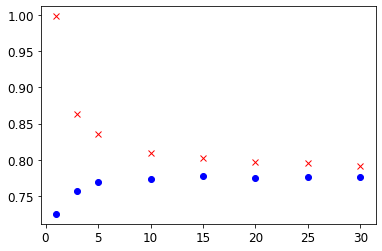

In [13]:
# K-Cross validation (k=10) on the original data
# KNN classifier with varying k values

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 

k_values = [1, 3, 5, 10, 15, 20, 25, 30]

metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for k in k_values:
    precision = []
    recall = []
    accuracy = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    train_score = []
    test_score = []
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        train_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
        
        #print(f"k={k}")
        #print("training score: ", knn.score(X_train, y_train))
        #print("testing score: ", knn.score(X_test, y_test))
    
        # plot a confusion matrix
        confusion_mat = confusion_matrix(y_test, y_pred)
        #print(confusion_mat)
    
        #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        results = classification_report(y_test, y_pred, target_names=target_names)
        #print(results)

        metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

        avg_precision = metrics_dict['weighted avg']['precision']
        #print('precision (weighted):', avg_precision)
        precision.append(avg_precision)
    
        avg_recall = metrics_dict['weighted avg']['recall']
        #print('recall avg (weighted):', avg_recall)
        recall.append(avg_recall)
    
        avg_accuracy = metrics_dict['accuracy']
        #print('accuracy: ', avg_accuracy)
        accuracy.append(avg_accuracy)
        
    print('\n******* Performance with k =', k, '*******')
    print('Precision: ', sum(precision)/len(precision))
    print('Recall: ', sum(recall)/len(recall))
    print('Accuracy: ', sum(accuracy)/len(accuracy))
    print('**************************************\n')
    
    plt.plot(k, np.mean(test_score), 'bo')
    plt.plot(k, np.mean(train_score), 'rx')
    

k = 25 is best 

In [16]:
from sklearn import preprocessing

data = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
print(data.head())

# normalized
min_max = preprocessing.MinMaxScaler()

col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']
normData = min_max.fit_transform(data)

normData = pd.DataFrame(normData, columns = col)
print(normData.head())

X_normalized = normData.to_numpy()

   bedrooms  bathrooms  sqft_living  sqft_lot  most_recent
0         3       1.00         1180      5650         1955
1         3       2.25         2570      7242         1991
2         2       1.00          770     10000         1933
3         4       3.00         1960      5000         1965
4         3       2.00         1680      8080         1987
   bedrooms  bathrooms  sqft_living  sqft_lot  most_recent
0  0.090909    0.12500     0.067170  0.003108     0.478261
1  0.090909    0.28125     0.172075  0.004072     0.791304
2  0.060606    0.12500     0.036226  0.005743     0.286957
3  0.121212    0.37500     0.126038  0.002714     0.565217
4  0.090909    0.25000     0.104906  0.004579     0.756522



******* Performance with k = 1 *******
Precision:  0.7230262718148852
Recall:  0.7236386909732083
Accuracy:  0.7236386909732083
**************************************


******* Performance with k = 3 *******
Precision:  0.7543211300590373
Recall:  0.7574148155540597
Accuracy:  0.7574148155540597
**************************************


******* Performance with k = 5 *******
Precision:  0.7646939648678418
Recall:  0.7681949961487199
Accuracy:  0.7681949961487199
**************************************


******* Performance with k = 10 *******
Precision:  0.7646665531222592
Recall:  0.7680563449277606
Accuracy:  0.7680563449277606
**************************************


******* Performance with k = 15 *******
Precision:  0.7698558719069393
Recall:  0.7734694902451578
Accuracy:  0.7734694902451578
**************************************


******* Performance with k = 20 *******
Precision:  0.7711632031813526
Recall:  0.7745337202466618
Accuracy:  0.7745337202466618
***********************

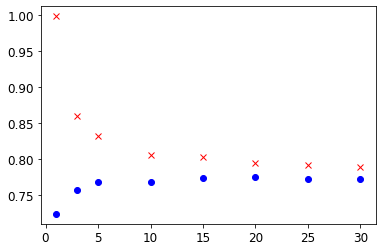

In [17]:
# K-Cross Validation on the normalized data
# KNN classifier with varying k values

k_values = [1, 3, 5, 10, 15, 20, 25, 30]

for k in k_values:
    precision = []
    recall = []
    accuracy = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    train_score = []
    test_score = []
    for train_index, test_index in kf.split(X_normalized):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        train_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
        
        #print(f"k={k}")
        #print("training score: ", knn.score(X_train, y_train))
        #print("testing score: ", knn.score(X_test, y_test))
    
        # plot a confusion matrix
        confusion_mat = confusion_matrix(y_test, y_pred)
        #print(confusion_mat)
    
        #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        results = classification_report(y_test, y_pred, target_names=target_names)
        #print(results)

        metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

        avg_precision = metrics_dict['weighted avg']['precision']
        #print('precision (weighted):', avg_precision)
        precision.append(avg_precision)
    
        avg_recall = metrics_dict['weighted avg']['recall']
        #print('recall avg (weighted):', avg_recall)
        recall.append(avg_recall)
    
        avg_accuracy = metrics_dict['accuracy']
        #print('accuracy: ', avg_accuracy)
        accuracy.append(avg_accuracy)
        
    print('\n******* Performance with k =', k, '*******')
    print('Precision: ', sum(precision)/len(precision))
    print('Recall: ', sum(recall)/len(recall))
    print('Accuracy: ', sum(accuracy)/len(accuracy))
    print('**************************************\n')
    
    plt.plot(k, np.mean(test_score), 'bo')
    plt.plot(k, np.mean(train_score), 'rx')
    


Normalized vs non-normalized data does not change the model substantially.

In [18]:
# change DataFrame to numpy array
XX = X.to_numpy()

knn = KNeighborsClassifier(n_neighbors = 30)

kf = KFold(n_splits=10, random_state=None, shuffle=True) 

precision_sum = recall_sum = accuracy_sum = 0

for train_index, test_index in kf.split(XX):
    X_train, X_test = XX[train_index], XX[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    result_metrics_dict = classification_report(y_test, y_pred, output_dict=True)
    
    precision_sum += result_metrics_dict["weighted avg"]["precision"]
    recall_sum += result_metrics_dict["weighted avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]

print("Avg precision (weighted):", precision_sum/kf.get_n_splits(X))
print("Avg recall (weighted):", recall_sum/kf.get_n_splits(X))
print("Accuracy:", accuracy_sum/kf.get_n_splits(X))

              precision    recall  f1-score   support

       Under       0.79      0.88      0.83      1344
        Over       0.75      0.61      0.67       818

    accuracy                           0.78      2162
   macro avg       0.77      0.74      0.75      2162
weighted avg       0.77      0.78      0.77      2162

              precision    recall  f1-score   support

       Under       0.81      0.87      0.84      1407
        Over       0.71      0.61      0.66       755

    accuracy                           0.78      2162
   macro avg       0.76      0.74      0.75      2162
weighted avg       0.77      0.78      0.77      2162

              precision    recall  f1-score   support

       Under       0.80      0.86      0.83      1379
        Over       0.72      0.62      0.66       783

    accuracy                           0.77      2162
   macro avg       0.76      0.74      0.75      2162
weighted avg       0.77      0.77      0.77      2162

              preci

### KNN classifier with K = 25 on original data

In [11]:
knn = KNeighborsClassifier(n_neighbors = 25)

# 10-fold CV
kf = KFold(n_splits=10, random_state=None, shuffle=True) 
precision_sum = recall_sum = accuracy_sum = 0

# DataFrame for storing validation metrics
metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    #print(confusion_mat)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    precision_sum += result_metrics_dict["macro avg"]["precision"]
    recall_sum += result_metrics_dict["macro avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]
    
    metrics_list = []
    metrics_list.append(result_metrics_dict["macro avg"]["precision"])
    metrics_list.append(result_metrics_dict["macro avg"]["recall"])
    metrics_list.append(result_metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

print("Average precision:", precision_sum/kf.get_n_splits(X))
print("Average recall:", recall_sum/kf.get_n_splits(X))
print("Average accuracy:", accuracy_sum/kf.get_n_splits(X))

#os.makedirs('./MLP3_data', exist_ok=True)  
metrics_df.to_csv('./MLP3_data/best_knn_metrics.csv')


              precision    recall  f1-score   support

       Under       0.79      0.87      0.83      1337
        Over       0.75      0.63      0.69       825

    accuracy                           0.78      2162
   macro avg       0.77      0.75      0.76      2162
weighted avg       0.78      0.78      0.78      2162

              precision    recall  f1-score   support

       Under       0.80      0.88      0.84      1368
        Over       0.75      0.63      0.68       794

    accuracy                           0.78      2162
   macro avg       0.77      0.75      0.76      2162
weighted avg       0.78      0.78      0.78      2162

              precision    recall  f1-score   support

       Under       0.80      0.86      0.83      1370
        Over       0.72      0.62      0.67       792

    accuracy                           0.77      2162
   macro avg       0.76      0.74      0.75      2162
weighted avg       0.77      0.77      0.77      2162

              preci

#### Model 3: Naive Bayes classifier

In [20]:
from sklearn.naive_bayes import GaussianNB

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'most_recent']]
y = df['price_range']

# split the data into training data and testing data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

In [21]:
from sklearn.model_selection import KFold 

# We start with k=10 
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 10 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print (kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [22]:
# Apply k-cross when k = 10
nbclf = GaussianNB()

for train_index, test_index in kf.split(X):
    # for each iteration, get training data and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the model using training data
    nbclf.fit(X_train, y_train)
    
    # show how model performs with training data and test data
    print('Accuracy of GaussianNB classifier on training set: {:.2f}'
         .format(nbclf.score(X_train, y_train)))

    print('Accuracy of GaussianNB classifier on test set: {:.2f}'
         .format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.75
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.76
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.75
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.75
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.75
Accuracy of GaussianNB classifier on training set: 0.75
Accuracy of GaussianNB classifier on test set: 0.76
Accuracy of GaussianNB classifier on training set: 0.75
Accuracy of GaussianNB classifier on test set: 0.77
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.76
Accuracy of GaussianNB classifier on training set: 0.76
Accuracy of GaussianNB classifier on test set: 0.76
Accuracy of GaussianNB class

### NB classifier with k-cross = 10

In [23]:
# Model performance using k-cross
nbclf2 = GaussianNB()

precision_sum = recall_sum = accuracy_sum = 0

metrics_df = pd.DataFrame(columns = ['precision', 'recall', 'accuracy'])

for train_index, test_index in kf.split(X):
    # for each iteration, get training data and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the model using training data
    nbclf2.fit(X_train, y_train)
    
    # predict y values using test data
    y_pred = nbclf2.predict(X_test)

    confusion_mat = confusion_matrix(y_test, y_pred)
    #print(confusion_mat)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Since we can retrieve a dictionary of metrics and access the values using dictionary,
    # now we can sum of the results of each iteration and get the average
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    #print(result_metrics_dict)
    
    precision_sum += result_metrics_dict["weighted avg"]["precision"]
    recall_sum += result_metrics_dict["weighted avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]
    
    metrics_list = []
    metrics_list.append(result_metrics_dict["weighted avg"]["precision"])
    metrics_list.append(result_metrics_dict["weighted avg"]["recall"])
    metrics_list.append(result_metrics_dict["accuracy"])
    
    metrics_series = pd.Series(metrics_list, index=metrics_df.columns)
    metrics_df = metrics_df.append(metrics_series, ignore_index=True)

print("Avg precision:", precision_sum/kf.get_n_splits(X))
print("Avg recall:", recall_sum/kf.get_n_splits(X))
print("Accuracy:", accuracy_sum/kf.get_n_splits(X))

metrics_df.to_csv('./MLP3_data/nb_metrics.csv')

              precision    recall  f1-score   support

       Under       0.76      0.93      0.83      1379
        Over       0.79      0.47      0.59       783

    accuracy                           0.76      2162
   macro avg       0.77      0.70      0.71      2162
weighted avg       0.77      0.76      0.75      2162

              precision    recall  f1-score   support

       Under       0.74      0.92      0.82      1338
        Over       0.80      0.48      0.60       824

    accuracy                           0.76      2162
   macro avg       0.77      0.70      0.71      2162
weighted avg       0.76      0.76      0.74      2162

              precision    recall  f1-score   support

       Under       0.73      0.92      0.82      1347
        Over       0.76      0.45      0.57       815

    accuracy                           0.74      2162
   macro avg       0.75      0.68      0.69      2162
weighted avg       0.75      0.74      0.72      2162

              preci

Accuracy =  0.8228294890777875


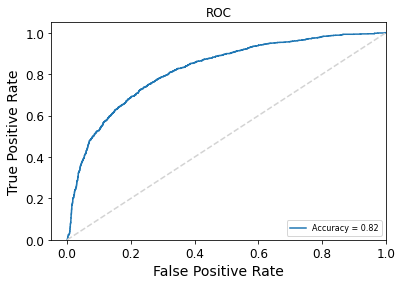

In [24]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

y_score = nbclf2.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Model evaluation